# House Prices

<p>Ev fiyatlarının ev özellikleri ile ilgisini araştırma amacıyla veri setimizi incelemeye başlayalım.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import seaborn as sns


from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import chisquare
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse



color = ["DarkBlue", "Red"]
sns.set_palette(color)
sns.set(font="Verdana")
title_style = {'family': 'Verdana', 'color': 'darkred', 'size': 16 }
axis_style  = {'family': 'Verdana', 'color': 'darkblue', 'size': 13 }

import warnings
warnings.filterwarnings('ignore')

In [2]:
house = pd.read_csv("train.csv",  delimiter=',')
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
house.shape

(1460, 81)

<p style="font-size:110%;"> Veri setimizde 81 özelliğe sahip 1460 verimiz bulunmakta. Özelliklerimizi incelediğimizde 1460 Id ye sahip olduğumuzu görüyoruz. Bu demektir ki ev bilgileri içinde tekrarlar(duplication) bulunmamakta. Ayrıca bazı özelliklerimizde boş değerlerin oldukça fazla olduğunu söyleyebiliriz. Boş verileri daha sonra detaylı inceleyeceğiz </p>

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
house.nunique().head(25)

Id              1460
MSSubClass        15
MSZoning           5
LotFrontage      110
LotArea         1073
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
OverallQual       10
OverallCond        9
YearBuilt        112
YearRemodAdd      61
RoofStyle          6
RoofMatl           8
Exterior1st       15
Exterior2nd       16
dtype: int64

<p> Veri setimizdeki özelliklere baktığımızda çok açıklayıcı olmadıklarını farkediyoruz. Bu nedenle özelliklerin aldığı değerler ile açıklamalarını inceleyelim.</p>

In [7]:
f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<p>Verimizi daha detaylı inceleyip ortalama, standart sapma gibi özelliklerine bakalım.<br>
 Ev id/numaraları sonucumuzu etkilemediği için daha sonra o özelliğimizi sileceğiz.</p>

In [8]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


<p> Verilerimiz arasıdnaki ilişkiyi incelemek için Korelasyon Matrisini kullanalım.</p>

In [9]:
cor= house.corr()
display(cor)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


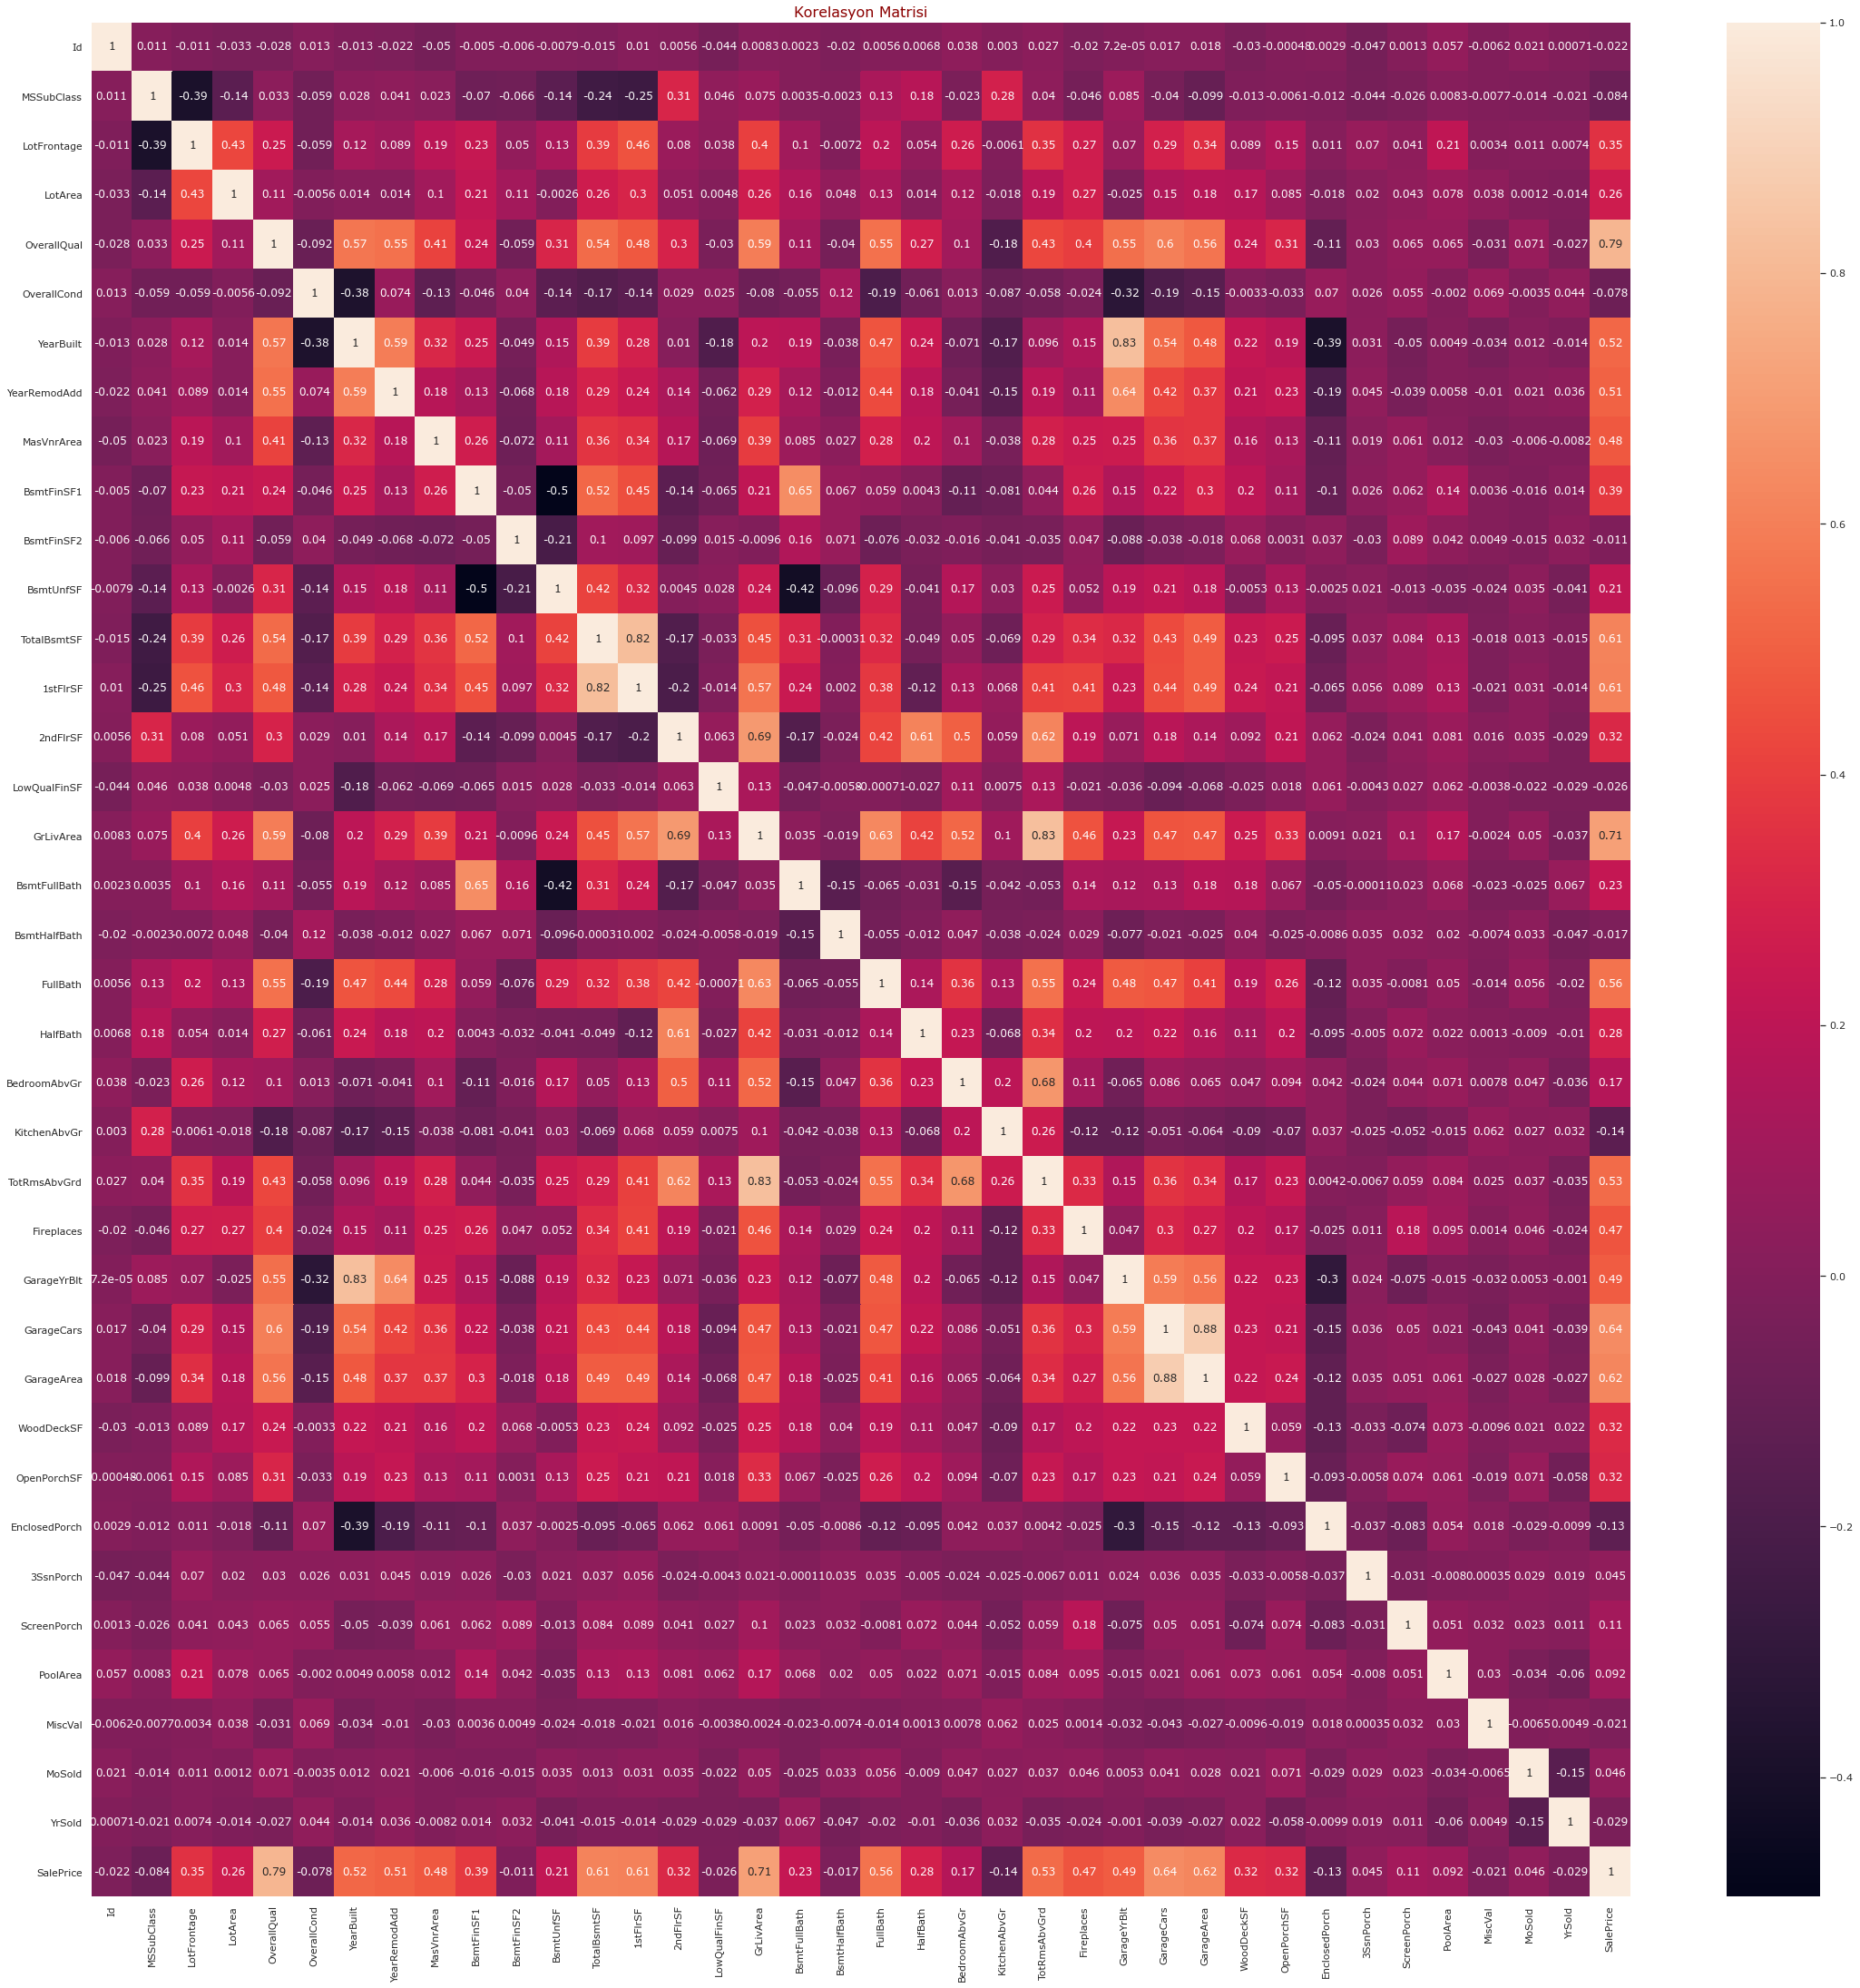

In [10]:
plt.figure(figsize=(38, 38))
sns.heatmap(cor, annot=True,linecolor="blue")
plt.title("Korelasyon Matrisi", fontdict=title_style)
plt.show()

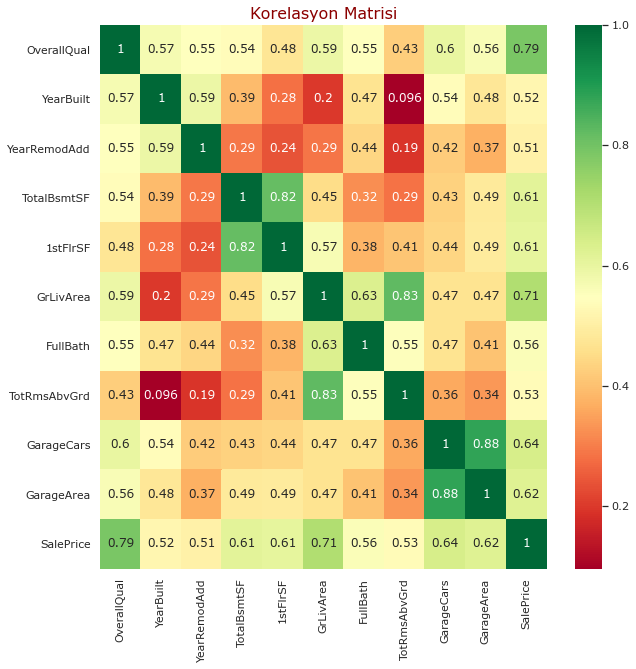

In [11]:
corrmat = house.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
plt.title("Korelasyon Matrisi", fontdict=title_style)
g = sns.heatmap(house[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<p>Korelasyon matrisini incelediğimizde:<br>
- Ev değerlendirmesi, evin yapıldığı yıl, yenilendiği yıl, toplam bodrum metrekaresi, 1.kat metrekaresi, yaşama alanı metrekaresi, kaç arabalık garajı olduğu, garaj metrekaresi, tam banyo sayısı ile bodrumun üstündeki toplam oda sayısının %50den yüksek korelasyona sahip olduğunu görüyoruz.</p>

<h2>Boş Değerlerin Tespiti ve Sayısal Değerlerin İncelenmesi</h2>

In [12]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()*100/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10).T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish
Total,1453.000000,1406.00000,1369.000000,1179.000000,690.000000,259.000000,81.000000,81.000000,81.000000,81.000000
Percent,99.520548,96.30137,93.767123,80.753425,47.260274,17.739726,5.547945,5.547945,5.547945,5.547945


<p>Boş verileri incelediğimizde bazı özelliklerimizin %80 üzerinde boş olduğunu görüyoruz. Bunları hedef değişken incelemesinden sonra düzenleyeceğiz.</p>

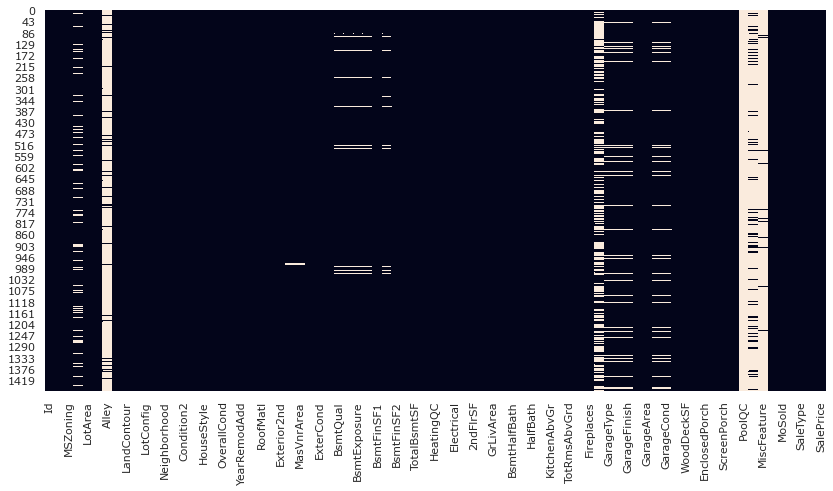

In [13]:
plt.figure(figsize=(14, 7))
sns.heatmap(house.isnull(), cbar=False)
plt.show()

In [14]:
house[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].head(10)

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,TA
2,NaN,NaN,NaN,NaN,TA
3,NaN,NaN,NaN,NaN,Gd
4,NaN,NaN,NaN,NaN,TA
5,NaN,Shed,NaN,MnPrv,NaN
6,NaN,NaN,NaN,NaN,Gd
7,NaN,Shed,NaN,NaN,TA
8,NaN,NaN,NaN,NaN,TA
9,NaN,NaN,NaN,NaN,TA


<p>Boş verilerimizin olduğu özellikleri incelediğimizde çoğunlukla 'NaN' verileri olduğunu görüyoruz. Bu demektir ki bu özelliğimiz incelediğimiz ev için geçerli olmayacaktır. </p>

In [15]:
a = house[['BldgType','HouseStyle','YearBuilt','TotalBsmtSF','GrLivArea','OverallQual','SalePrice']]
a[(a['YearBuilt']==1960) & (a['OverallQual']==6)]

,BldgType,HouseStyle,YearBuilt,TotalBsmtSF,GrLivArea,OverallQual,SalePrice
14,1Fam,1Story,1960,1253,1253,6,157000
153,1Fam,1Story,1960,1602,1252,6,235000
171,1Fam,1Story,1960,1080,1656,6,215000
327,1Fam,1Story,1960,1383,1383,6,145250
346,1Fam,1Story,1960,958,958,6,151500
347,1Fam,1Story,1960,1478,1478,6,157500
580,1Fam,1Story,1960,1144,1429,6,181900


<p>Aynı konut tipi ve tarzına sahip aynı yılda yapılmış ayrıca aynı değerlendirmeye sahip evlerin fiyatları arasında farkları inceleyelim. Yukarıdaki tabloyu incelediğimizde 346 numaralı evimizin yaşama alanı 327 numaralı evden küçük olmasına karşın fiyatı daha yüksektir. Bu sebeple konut tipi ve tarzı fiyatları belirlememizde etkili olmayacağını varsayabiliriz.</p>

In [16]:
house[['PoolArea','GarageArea','TotalBsmtSF','SalePrice']].head(7)

,PoolArea,GarageArea,TotalBsmtSF,SalePrice
0,0,548,856,208500
1,0,460,1262,181500
2,0,608,920,223500
3,0,642,756,140000
4,0,836,1145,250000
5,0,480,796,143000
6,0,636,1686,307000


Değerlendirecek olursak oda sayısı, garaj olması, havuz olma durumu ev fiyatları için oldukça etkili görülebilir ancak oda sayısı az olup havuzsuz ve garajsız evlerin fiyatlarının yüksek olduğu gerçeği de vardır.

<h2>Hedef Değişken İncelemesi</h2>

Hedef değişkene odaklanıp inceleyelim.

In [17]:
house.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<p>Ev fiyatlarının 34900 dolar ile 755000 dolar arasında değerler aldığını görüyoruz.</p>

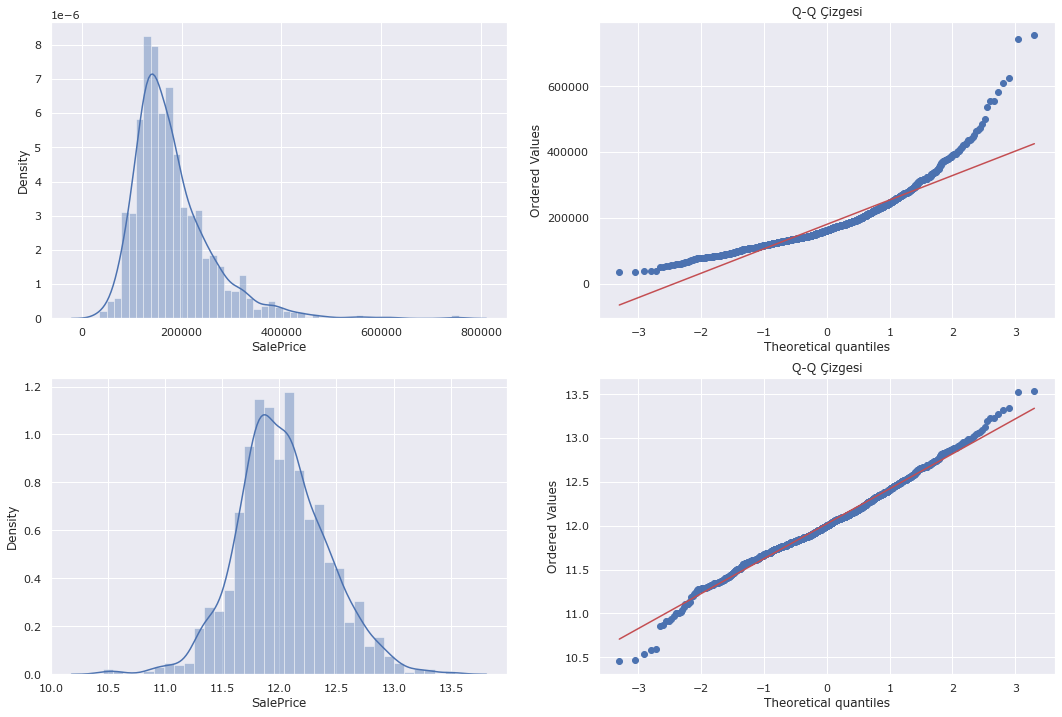

In [18]:
plt.figure(figsize=(18, 12))

plt.subplot(2,2,1)
sns.distplot(house['SalePrice'])

plt.subplot(2,2,2)
res = stats.probplot(house['SalePrice'], plot=plt)
plt.title("Q-Q Çizgesi")


plt.subplot(2,2,3)
sns.distplot(np.log(house['SalePrice']))

plt.subplot(2,2,4)
res = stats.probplot(np.log(house['SalePrice']), plot=plt)
plt.title("Q-Q Çizgesi")

plt.show()

<p>Bakarsak pozitif eğimli bir grafiğe sahibiz. Logaritmasını aldığımızda normal dağılıma yaklaşıyor gibi diyebiliriz.</p>

<p style="font-size:120%;"> Ev fiyatıyla yüksek korelasyona sahip özelliklerimizi değerlendirelim.</p>

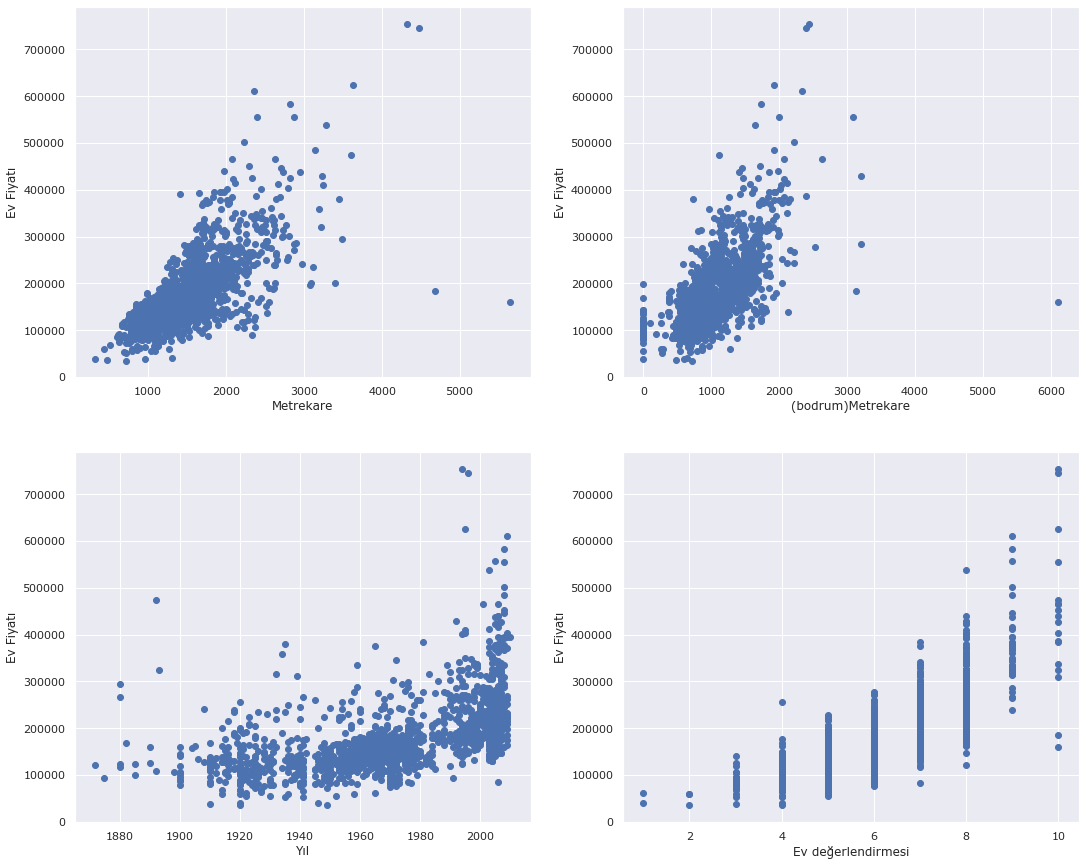

In [19]:
plt.figure(figsize=(18,15))

plt.subplot(2,2,1)
plt.scatter(house["GrLivArea"], house["SalePrice"])
plt.xlabel('Metrekare' )
plt.ylabel('Ev Fiyatı')

plt.subplot(2,2,2)
plt.scatter(house["TotalBsmtSF"], house["SalePrice"])
plt.xlabel('(bodrum)Metrekare' )
plt.ylabel('Ev Fiyatı')

plt.subplot(2,2,3)
plt.scatter(house["YearBuilt"], house["SalePrice"])
plt.xlabel('Yıl' )
plt.ylabel('Ev Fiyatı')

plt.subplot(2,2,4)
plt.scatter(house["OverallQual"], house["SalePrice"])
plt.xlabel('Ev değerlendirmesi' )
plt.ylabel('Ev Fiyatı')

plt.show()

<p> Hiç şüphesiz ki evin metrekaresi, bodrumun metrekaresi ve toplam oda sayısı arttıkça ev fiyatı artacaktır. Grafiklere bakınca bazı aykırı değerlerimiz olduğunu görüyoruz bunları daha sonra süzenleyeceğiz. Ayrıca evin değerlendirmesi, banyo sayısı, garaj alanı ve büyüklüğü arttıkça ev fiyatıda aynı şekilde artmaktadır.</p>

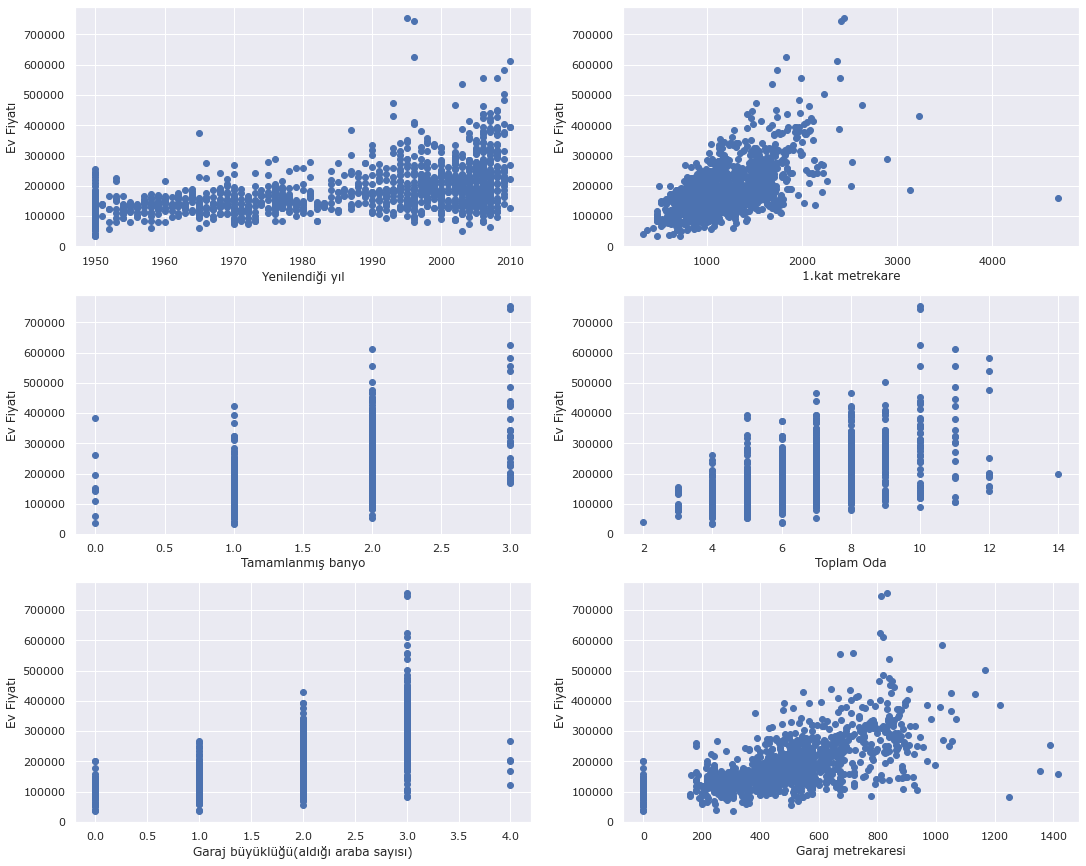

In [20]:
plt.figure(figsize=(18,15))

plt.subplot(321)
plt.scatter(house["YearRemodAdd"], house["SalePrice"])
plt.xlabel('Yenilendiği yıl' )
plt.ylabel('Ev Fiyatı')

plt.subplot(322)
plt.scatter(house["1stFlrSF"], house["SalePrice"])
plt.xlabel('1.kat metrekare' )
plt.ylabel('Ev Fiyatı')

plt.subplot(323)
plt.scatter(house["FullBath"], house["SalePrice"])
plt.xlabel('Tamamlanmış banyo' )
plt.ylabel('Ev Fiyatı')

plt.subplot(324)
plt.scatter(house["TotRmsAbvGrd"], house["SalePrice"])
plt.xlabel('Toplam Oda' )
plt.ylabel('Ev Fiyatı')

plt.subplot(325)
plt.scatter(house["GarageCars"], house["SalePrice"])
plt.xlabel('Garaj büyüklüğü(aldığı araba sayısı)' )
plt.ylabel('Ev Fiyatı')

plt.subplot(326)
plt.scatter(house["GarageArea"], house["SalePrice"])
plt.xlabel('Garaj metrekaresi' )
plt.ylabel('Ev Fiyatı')


plt.show()

<h2>Aşırı Değer/ Outlier İncelemesi</h2>

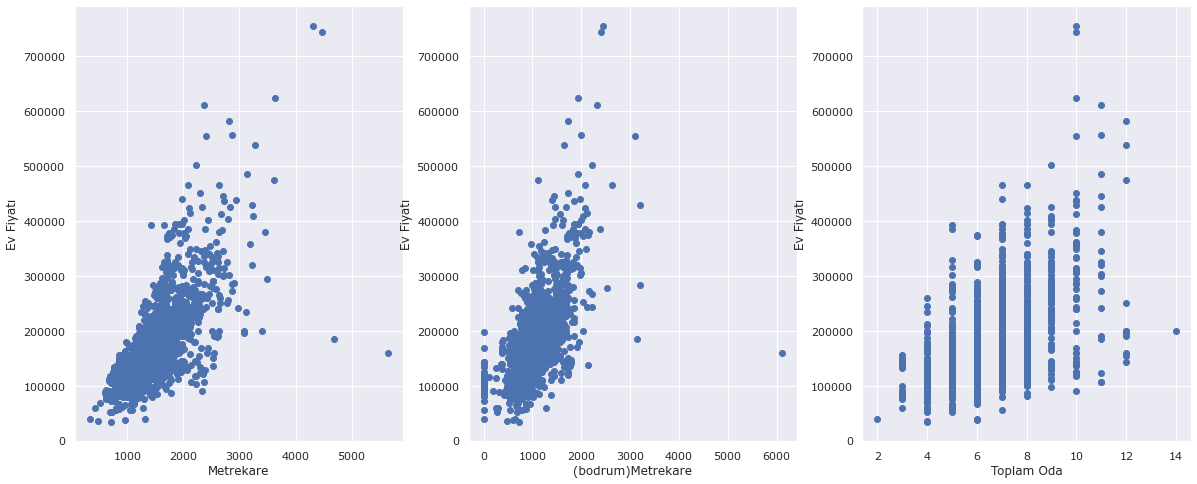

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(131)
plt.scatter(house["GrLivArea"], house["SalePrice"])
plt.xlabel('Metrekare' )
plt.ylabel('Ev Fiyatı')

plt.subplot(132)
plt.scatter(house["TotalBsmtSF"], house["SalePrice"])
plt.xlabel('(bodrum)Metrekare' )
plt.ylabel('Ev Fiyatı')

plt.subplot(133)
plt.scatter(house["TotRmsAbvGrd"], house["SalePrice"])
plt.xlabel('Toplam Oda' )
plt.ylabel('Ev Fiyatı')

plt.show()

In [22]:
new = house[(house["GrLivArea"]>4000) & (house["SalePrice"]<200000)]
new1 = house[(house["TotalBsmtSF"]>6000) & (house["SalePrice"]<200000)]
new2= house[(house["TotRmsAbvGrd"]>12) & (house["SalePrice"]<250000)]

<p>Evin metrekaresi arttıkça fiyatının artması beklenmektedir ancak yukarıdaki ilk grafiğimize baktığımızda 2 noktamızın/evimizin buna uymadığını görüyoruz.Duruma karşın evlerin değerlendirmeleri ve ev fiyatını etkileyen garajdaki araba sayısında bir sorun gözükmemektedir, bu tahminlememizde bizim için yanıltıcı olacaktır. Belirttiğimiz sebepler nedeniyle iki evimizin değerlerini silebiliriz.<br>
Aynı şekilde aşağıdaki tablolardaki evlerimiz ev fiyatlarıyla ilgili tahminimizde yanıltıcı olacaklar onlarıda sileceğiz.</p>

In [23]:
new[['GrLivArea','GarageCars','OverallQual','SalePrice']]

,GrLivArea,GarageCars,OverallQual,SalePrice
523,4676,3,10,184750
1298,5642,2,10,160000


In [24]:
new1[['TotalBsmtSF','GrLivArea','GarageCars','OverallQual','SalePrice']]

,TotalBsmtSF,GrLivArea,GarageCars,OverallQual,SalePrice
1298,6110,5642,2,10,160000


In [25]:
new2[['TotRmsAbvGrd','GrLivArea','GarageCars','OverallQual','SalePrice']]

,TotRmsAbvGrd,GrLivArea,GarageCars,OverallQual,SalePrice
635,14,3395,0,6,200000


In [26]:
house = house.drop(house[(house['GrLivArea']>4000) & (house['SalePrice']<300000)].index)
house = house.drop(house[(house["TotalBsmtSF"]>6000) & (house["SalePrice"]<200000)].index)
house = house.drop(house[(house["TotRmsAbvGrd"]>12) & (house["SalePrice"]<250000)].index)

<p> Yukarıdaki düzenlemeleri yaptıktan sonra elimizde kalan evlerimizi fiyatlarına göre gruplandırabiliriz.</p>

In [27]:
def make_category(SalePrice):
    if SalePrice >= 450000:
        return 'expensive'
    elif (SalePrice < 450000) and (SalePrice > 100000):
        return 'convenient'
    else:
        return 'cheap'

In [28]:
house['SalePrice_group'] = house['SalePrice'].apply(make_category)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_group
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,convenient
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,convenient
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,convenient
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,convenient
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,convenient


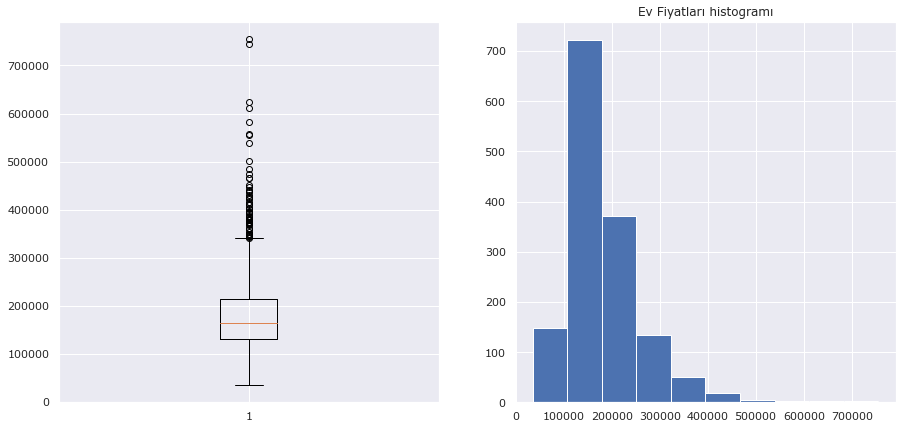

In [29]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.boxplot(house.SalePrice)

plt.subplot(122)
plt.hist(house["SalePrice"])
plt.title("Ev Fiyatları histogramı")

plt.show()

<p>Kutu grafiğini ve histogramımızı incelediğimizde bazı aykırı değerler olduğunu görüyoruz.</p>

In [30]:
from scipy.stats import zscore

z_scores = zscore(house["SalePrice"].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 190
------
Threshold value: 2
Number of Outliers: 63
------
Threshold value: 3
Number of Outliers: 22
------
Threshold value: 4
Number of Outliers: 9
------


<p>Logaritmasını aldığımızda fiyatların normale yaklaştığını göstermiştik. Bu sebeple logaritmasını alıp fiyatları düzenliyoruz.</p>

In [31]:
house['SalePrice'] = np.log(house['SalePrice'])

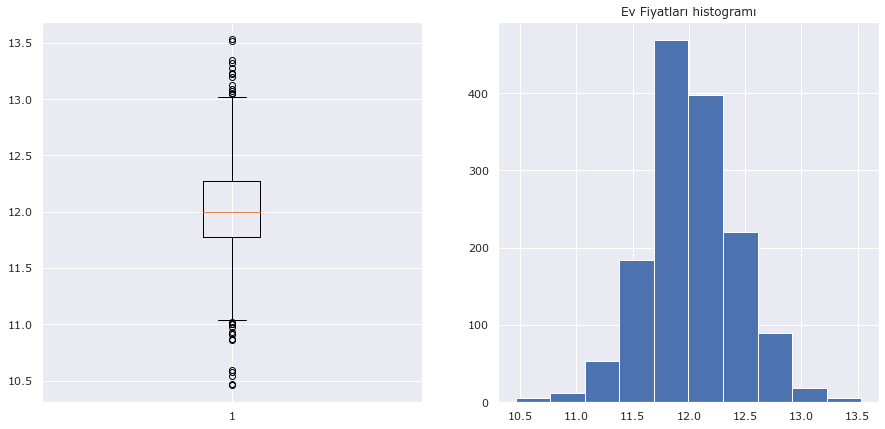

In [32]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.boxplot(house.SalePrice)

plt.subplot(122)
plt.hist(house["SalePrice"])
plt.title("Ev Fiyatları histogramı")

plt.show()

In [33]:
distribution_tests = pd.DataFrame(columns=['variable', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])


jb_stats = jarque_bera(np.log(house['SalePrice']))
norm_stats = normaltest(np.log(house['SalePrice']))
distribution_tests = distribution_tests.append({"variable": 'SalePrice',
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]}, ignore_index=True)
distribution_tests

,variable,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,SalePrice,47.531253,4.772205e-11,25.215082,0.000003


P-değerleri sıfıra yakın ancak sıfır olmadığı için log dönüştürülmüş değişkenlerin normal dağıldığını gösterir deriz.

<h2>Özellik Ekleme ve Silme</h2>

In [34]:
print(house['PoolArea'].value_counts())
print(house['PoolQC'].value_counts())

0      1451
738       1
648       1
576       1
555       1
519       1
512       1
Name: PoolArea, dtype: int64
Ex    2
Fa    2
Gd    2
Name: PoolQC, dtype: int64


<p>Havuz değerlendime verilerinin neredeyse %99 u boştu ve baktığımızda 6 ev haricinde havuzu olan evimiz yok. Bu özellikleri havuz var yada yok şeklinde kullanmamız daha yararlı olacaktır.<br><br>
'NaN' olan verilerimizi düzenleyelim.</p>

In [35]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    house[col].fillna('None',inplace=True)

In [36]:
house[['GrLivArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']].head(10)

,GrLivArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,1710,856,856,854,12.247694
1,1262,1262,1262,0,12.109011
2,1786,920,920,866,12.317167
3,1717,756,961,756,11.849398
4,2198,1145,1145,1053,12.429216
5,1362,796,796,566,11.870600
6,1694,1686,1694,0,12.634603
7,2090,1107,1107,983,12.206073
8,1774,952,1022,752,11.774520
9,1077,991,1077,0,11.678440


<p> GrLivArea özelliğimiz bodrum üzerindeki yaşama alanlarının metrekaresidir. Formüle edersek,<br>
   GrLivArea = 1stFlrSF + 2ndFlrSF </p>

OverallQual: Evin son halinin değerlendirilmesi<br>
YearBuilt: Orijinal yapım yılı<br>
YearRemodAdd: Yenileme tarihi (yenileme veya ekleme yoksa yapım yılı)<br>
TotalBsmtSF: Bodrumun metrekaresi<br>
1stFlrSF: Birinci kat metrekaresi<br>
GrLivArea: Yerden yukardaki yaşama alanı metrekaresi<br>
FullBath: Tam banyo sayısı<br>
TotRmsAbvGrd: Toplam oda sayısı (banyo dahil değil)<br>
GarageCars: Araba kapasitesine göre garaj boyutu<br>
GarageArea: Metrekare cinsinden garaj boyutu

In [37]:
house[['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','SalePrice']].head(10)

,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,SalePrice
0,2,1,1,0,12.247694
1,2,0,0,1,12.109011
2,2,1,1,0,12.317167
3,1,0,1,0,11.849398
4,2,1,1,0,12.429216
5,1,1,1,0,11.870600
6,2,0,1,0,12.634603
7,2,1,1,0,12.206073
8,2,0,0,0,11.774520
9,1,0,1,0,11.678440


In [38]:
house['TotalSF']= house['TotalBsmtSF']+house['1stFlrSF'] + house['2ndFlrSF']
house['Total_Bathrooms'] = (house['FullBath'] + (0.5 * house['HalfBath'])+house['BsmtFullBath'] + (0.5 * house['BsmtHalfBath']))

<p> - TotalSF ile bodrum,1.kat ve 2.kattaki alanların toplam metre karesini hesaplamış oluyoruz. Bu durumda ev fiyatları ile korelasyona sahip olduğunu söylediğimiz toplam bodrum metre karesi, 1.kat metre kare ve yaşam alanı metre karesi yerine toplam metre kareyi kullanabiliriz.<br>
    - Total_Bathrooms özelliği ile evdeki tam ve yarım banyoların toplamını hesaplamış olduk.</p>

In [39]:
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_group,TotalSF,Total_Bathrooms
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,0,2,2008,WD,Normal,12.247694,convenient,2566,3.5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,0,5,2007,WD,Normal,12.109011,convenient,2524,2.5
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,0,9,2008,WD,Normal,12.317167,convenient,2706,3.5
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,0,2,2006,WD,Abnorml,11.849398,convenient,2473,2.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,0,12,2008,WD,Normal,12.429216,convenient,3343,3.5
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,Shed,700,10,2009,WD,Normal,11.870600,convenient,2158,2.5
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,None,0,8,2007,WD,Normal,12.634603,convenient,3380,3.0
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,Shed,350,11,2009,WD,Normal,12.206073,convenient,3197,3.5
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,None,0,4,2008,WD,Abnorml,11.774520,convenient,2726,2.0
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,None,0,1,2008,WD,Normal,11.678440,convenient,2068,2.0


In [40]:
house1 = house.copy()

In [41]:
print('house1 veri setinin boyutu:', house1.shape)

house1 veri setinin boyutu: (1457, 84)


Yukarda yaptığımız iki yeni özelliğimiz verisetimize eklenmiş durumdadır.

In [42]:
house1['has_pool'] = house1['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
house1['has_garage'] = house1['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
house1['has_bsmt'] = house1['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house1['has_2ndfloor'] = house1['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
house1['has_fireplace'] = house1['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

Veri setimize 5 tane yeni özellik daha ekledik Bunlar özelliğimiz var mı,yok mu sorularına cevap oluşturuyorlar.

In [43]:
house1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleCondition,SalePrice,SalePrice_group,TotalSF,Total_Bathrooms,has_pool,has_garage,has_bsmt,has_2ndfloor,has_fireplace
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,Normal,12.247694,convenient,2566,3.5,0,1,1,1,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,Normal,12.109011,convenient,2524,2.5,0,1,1,0,1
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,Normal,12.317167,convenient,2706,3.5,0,1,1,1,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,Abnorml,11.849398,convenient,2473,2.0,0,1,1,1,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,Normal,12.429216,convenient,3343,3.5,0,1,1,1,1


In [44]:
house1 = house1.drop(['Id','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath','HalfBath',
                          'BsmtFullBath','BsmtHalfBath','Alley','Fence','MiscFeature','PoolArea', 'Utilities', 'PoolQC', 'FireplaceQu', 'LotFrontage'], axis=1)

In [45]:
house1.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleCondition,SalePrice,SalePrice_group,TotalSF,Total_Bathrooms,has_pool,has_garage,has_bsmt,has_2ndfloor,has_fireplace
0,60,RL,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Normal,12.247694,convenient,2566,3.5,0,1,1,1,0
1,20,RL,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Normal,12.109011,convenient,2524,2.5,0,1,1,0,1
2,60,RL,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Normal,12.317167,convenient,2706,3.5,0,1,1,1,1
3,70,RL,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Abnorml,11.849398,convenient,2473,2.0,0,1,1,1,1
4,60,RL,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Normal,12.429216,convenient,3343,3.5,0,1,1,1,1


Yeni özellikler ekleme ve var olanları silmenin yanında hala ilgilenmemiz gereken boş veriler olduğunu görüyoruz. 

In [46]:
total = house1.isnull().sum().sort_values(ascending=False)
percent = (house1.isnull().sum()*100/house1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10).T

,GarageYrBlt,MasVnrArea,has_fireplace,Heating,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation
Total,80.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,5.490734,0.549073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
house1.GarageYrBlt.mean()

1978.4640522875818

<p>Garaj yılı özelliğindeki boşlukları evin yapıldığı sene ile doldurmanın daha mantıklı olduğunu düşünüyoruz. Ortalama ile doldurmuş olsan belki 2005 yılında inşa edilmiş bir evin garajı 1978 yılında yapılmış görünecekti.</p>

In [48]:
house1['GarageYrBlt'] = house1['GarageYrBlt'].fillna(house1['YearBuilt'])
house1['MasVnrArea'] = house1['MasVnrArea'].fillna(house1['MasVnrArea'].mean())

In [49]:
house1.GarageYrBlt = house1.GarageYrBlt.astype(int)

In [50]:
corre= house1.corr()

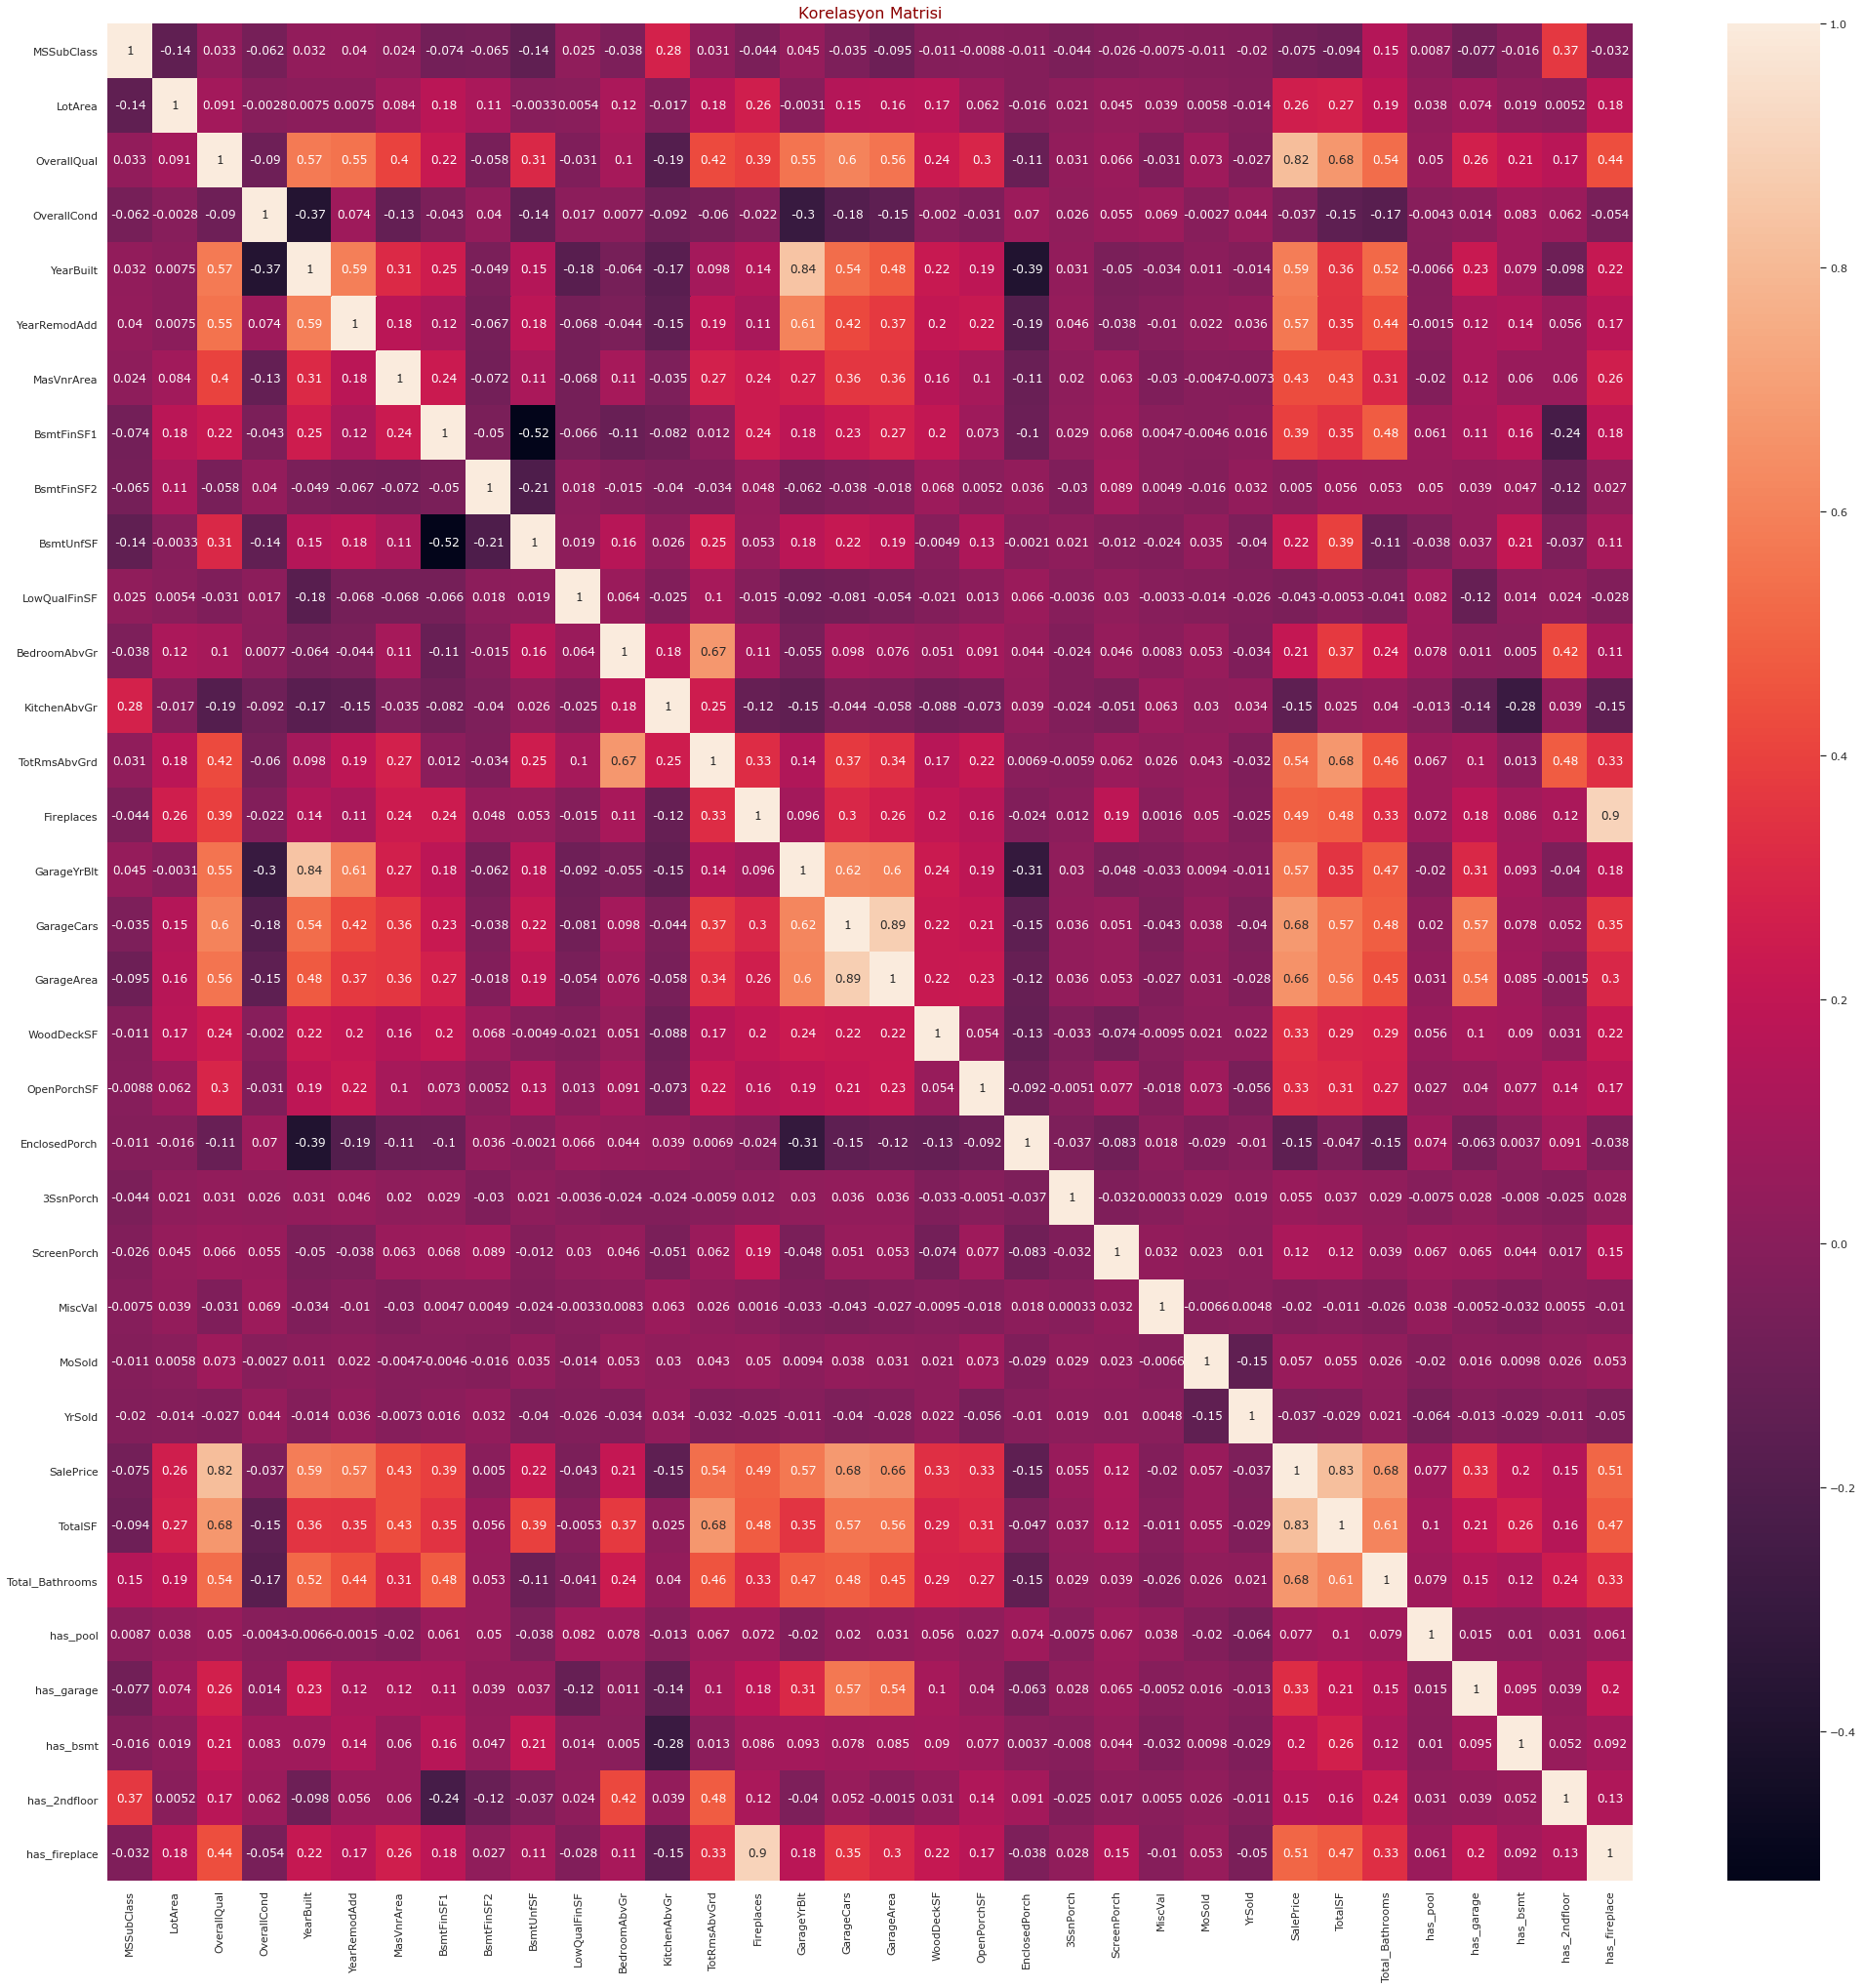

In [51]:
plt.figure(figsize=(35, 35))
sns.heatmap(corre, annot=True,linecolor="blue")
plt.title("Korelasyon Matrisi", fontdict=title_style)
plt.show()

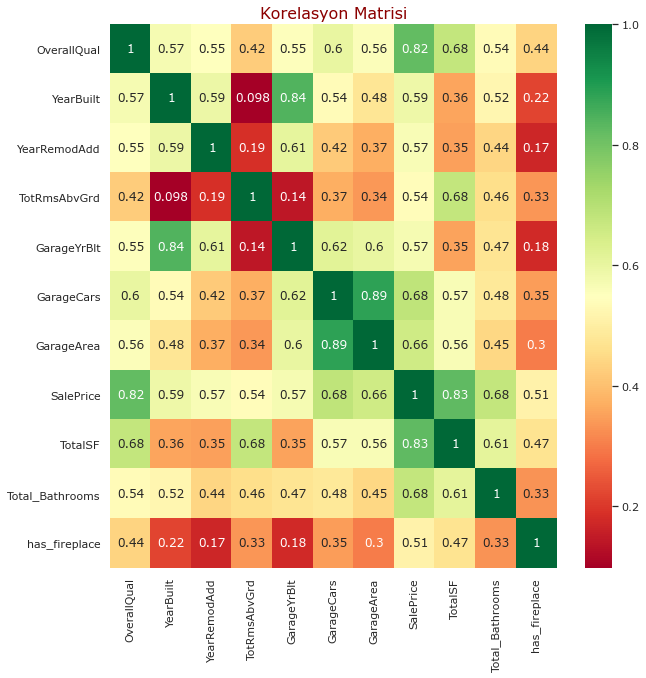

In [52]:
corrmat = house1.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
plt.title("Korelasyon Matrisi", fontdict=title_style)
g = sns.heatmap(house1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<p>Yeni eklenen özelliklerimizle beraber özelliklerimizle ev fiyatları arasındaki korelasyonu inceleyelim.<br>
 İlk incelememizdeki bazı özelliklerimiz halen yüksek korelasyona sahipken yeni eklediğimiz toplam metrekare, toplam banyo sayısı ve evde şömine bulunması özellikleriyle düzenlediğimiz garaj inşa yılı özelliğimiz %50 üzerinde korelasyona sahipler.</p>

<p>Veri setimizi modellerde kullanmak adına düzenleyelim.</p>

In [53]:
categorical_feature_mask = house1.dtypes==object
categorical_cols = house1.columns[categorical_feature_mask].tolist()

In [54]:
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'SalePrice_group']

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
house1[categorical_cols] = house1[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [56]:
house1.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleCondition,SalePrice,SalePrice_group,TotalSF,Total_Bathrooms,has_pool,has_garage,has_bsmt,has_2ndfloor,has_fireplace
0,60,3,8450,1,3,3,4,0,5,2,...,4,12.247694,1,2566,3.5,0,1,1,1,0
1,20,3,9600,1,3,3,2,0,24,1,...,4,12.109011,1,2524,2.5,0,1,1,0,1
2,60,3,11250,1,0,3,4,0,5,2,...,4,12.317167,1,2706,3.5,0,1,1,1,1
3,70,3,9550,1,0,3,0,0,6,2,...,0,11.849398,1,2473,2.0,0,1,1,1,1
4,60,3,14260,1,0,3,2,0,15,2,...,4,12.429216,1,3343,3.5,0,1,1,1,1
5,50,3,14115,1,0,3,4,0,11,2,...,4,11.870600,1,2158,2.5,0,1,1,1,0
6,20,3,10084,1,3,3,4,0,21,2,...,4,12.634603,1,3380,3.0,0,1,1,0,1
7,60,3,10382,1,0,3,0,0,14,4,...,4,12.206073,1,3197,3.5,0,1,1,1,1
8,50,4,6120,1,3,3,4,0,17,0,...,0,11.774520,1,2726,2.0,0,1,1,1,1
9,190,3,7420,1,3,3,0,0,3,0,...,4,11.678440,1,2068,2.0,0,1,1,0,1


In [57]:
house1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1457 non-null   int64  
 1   MSZoning         1457 non-null   int32  
 2   LotArea          1457 non-null   int64  
 3   Street           1457 non-null   int32  
 4   LotShape         1457 non-null   int32  
 5   LandContour      1457 non-null   int32  
 6   LotConfig        1457 non-null   int32  
 7   LandSlope        1457 non-null   int32  
 8   Neighborhood     1457 non-null   int32  
 9   Condition1       1457 non-null   int32  
 10  Condition2       1457 non-null   int32  
 11  BldgType         1457 non-null   int32  
 12  HouseStyle       1457 non-null   int32  
 13  OverallQual      1457 non-null   int64  
 14  OverallCond      1457 non-null   int64  
 15  YearBuilt        1457 non-null   int64  
 16  YearRemodAdd     1457 non-null   int64  
 17  RoofStyle     

<h2> Regresyon, Sınıflandırma ve Makina Algoritmaları</h2>

Elimizdeki hedef değişkenimiz ve özelliklerimizle modelimizi oluşturalım.

In [58]:
Y = house1['SalePrice']
X = house1[['OverallQual','YearBuilt','YearRemodAdd','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','TotalSF','Total_Bathrooms','has_fireplace']]

In [59]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [60]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     946.5
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        22:45:35   Log-Likelihood:                 741.07
No. Observations:                1457   AIC:                            -1460.
Df Residuals:                    1446   BIC:                            -1402.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2557      0.520      8.181      0.000       3.235       5.276
OverallQual         0.0799      0.005     17.272      0.000       0.071       0.089
YearBuilt           0.0013      0.000      5.141      0.000       0.001       0.002
YearRemodAdd        0.0023      0.000      9.240      0.000       0.002       0.003
TotRmsAbvGrd        0.0033      0.003      0.960      0.337      -0.003       0.010
GarageYrBlt        -0.0004      0.000     -1.283      0.200      -0.001       0.000
GarageCars          0.0184      0.012      1.536      0.125      -0.005       0.042
GarageArea          0.0002   4.14e-05      4.846      0.000       0.000       0.000
TotalSF             0.0002   9.22e-06     20.908      0.000       0.000       0.000
Total_Bathrooms     0.0550      0.007      7.921      0.000       0.041       0.069
has_fireplace       0.0746      0.009      8.329      0.000       0.057       0.092
==============================================================================
Omnibus:                      313.403   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.661
Skew:                          -0.980   Prob(JB):                    5.98e-278
Kurtosis:                       7.146   Cond. No.                     5.88e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
sonuclar = sm.OLS(y_train, X_train).fit()
sonuclar.summary()

Eğitim kümesindeki gözlem sayısı : 1165
Test kümesindeki gözlem sayısı   : 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     837.3
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        22:45:36   Log-Likelihood:                 638.43
No. Observations:                1165   AIC:                            -1255.
Df Residuals:                    1154   BIC:                            -1199.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.7630      0.558      8.539      0.000       3.669       5.857
OverallQual         0.0802      0.005     16.113      0.000       0.070       0.090
YearBuilt           0.0016      0.000      5.314      0.000       0.001       0.002
YearRemodAdd        0.0022      0.000      8.161      0.000       0.002       0.003
TotRmsAbvGrd        0.0006      0.004      0.165      0.869      -0.006       0.008
GarageYrBlt        -0.0008      0.000     -2.198      0.028      -0.001   -8.06e-05
GarageCars          0.0284      0.013      2.225      0.026       0.003       0.053
GarageArea          0.0002    4.4e-05      4.442      0.000       0.000       0.000
TotalSF             0.0002   1.01e-05     19.277      0.000       0.000       0.000
Total_Bathrooms     0.0590      0.008      7.850      0.000       0.044       0.074
has_fireplace       0.0723      0.010      7.468      0.000       0.053       0.091
==============================================================================
Omnibus:                      205.314   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              639.618
Skew:                          -0.869   Prob(JB):                    1.28e-139
Kurtosis:                       6.186   Cond. No.                     5.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

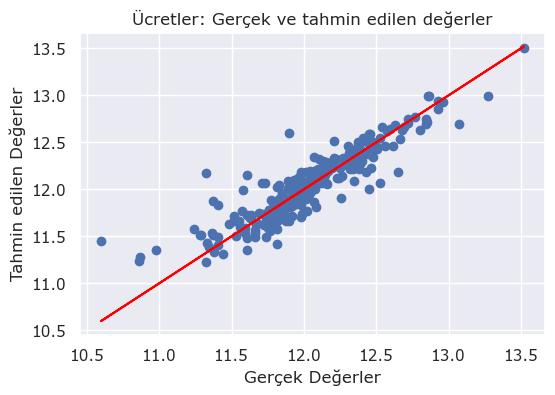

Ortalama Mutlak Hata (MAE)        : 0.11540860565480816
Ortalama Kare Hata (MSE)          : 0.02785379954660303
Kök Ortalama Kare Hata (RMSE)     : 0.16689457614495154
Ortalama Mutlak Yüzde Hata (MAPE) : 0.9692699343202872


In [62]:
X_test = sm.add_constant(X_test)
y_preds = sonuclar.predict(X_test)
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Ücretler: Gerçek ve tahmin edilen değerler")
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

<p style="font-size:120%;">  Belirlediğimiz özelliğimizle modelimizi oluşturup incelediğimizde modelin hedefteki varyansının ne kadar iyi hesapladığını anlatan R-kare değeri 0.867 çıkmıştır.Buna ek olarak eğitim ve test kümesine ayırıp eğitim kümesini kullanarak eğitiyoruz. Baktığımızda elimizdeki R-kare değeri 0.879 olarak artış göstermiştir. Değerlendirme metriklerimizi ve grafiğimizi inceleyelim. Dört ölçümünde düşük değerler olaması, modelin performansı için iyidir ve bizim ölçümlerimiz düşük değerler almıştır.</p>

<h3><ins> Modeli İyileştirmek</ins></h3>

<p style="font-size:120%;"> Önceki modelimiz üzerinde iyileştirme yapıp yukardaki modelle karşılaştırmak için veri setimizdeki diğer özelliklerimizinde dahil edildiği bir model kullanalım. </p>

In [63]:
Y = house1['SalePrice']
X = house1.drop('SalePrice', axis=1)

In [64]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression()

In [65]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
sonuclar = sm.OLS(y_train, X_train).fit()
sonuclar.summary()

Eğitim kümesindeki gözlem sayısı : 1165
Test kümesindeki gözlem sayısı   : 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     232.5
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        22:45:42   Log-Likelihood:                 1027.6
No. Observations:                1165   AIC:                            -1911.
Df Residuals:                    1093   BIC:                            -1547.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              15.6940      4.903      3.201      0.001       6.074      25.314
MSSubClass      -9.034e-05      0.000     -0.522      0.602      -0.000       0.000
MSZoning           -0.0109      0.005     -2.001      0.046      -0.021      -0.000
LotArea          2.356e-06   3.74e-07      6.298      0.000    1.62e-06    3.09e-06
Street              0.1966      0.046      4.251      0.000       0.106       0.287
LotShape           -0.0025      0.002     -1.043      0.297      -0.007       0.002
LandContour        -0.0074      0.005     -1.494      0.136      -0.017       0.002
LotConfig          -0.0013      0.002     -0.627      0.531      -0.005       0.003
LandSlope          -0.0007      0.014     -0.048      0.962      -0.028       0.027
Neighborhood       -0.0004      0.001     -0.790      0.430      -0.002       0.001
Condition1          0.0025      0.004      0.672      0.502      -0.005       0.010
Condition2         -0.0090      0.013     -0.703      0.482      -0.034       0.016
BldgType           -0.0119      0.005     -2.179      0.030      -0.023      -0.001
HouseStyle          0.0019      0.002      0.782      0.434      -0.003       0.007
OverallQual         0.0600      0.004     13.771      0.000       0.051       0.069
OverallCond         0.0291      0.004      7.619      0.000       0.022       0.037
YearBuilt           0.0016      0.000      5.448      0.000       0.001       0.002
YearRemodAdd        0.0007      0.000      2.938      0.003       0.000       0.001
RoofStyle        4.425e-06      0.004      0.001      0.999      -0.008       0.008
RoofMatl           -0.0127      0.005     -2.369      0.018      -0.023      -0.002
Exterior1st        -0.0029      0.002     -1.452      0.147      -0.007       0.001
Exterior2nd         0.0020      0.002      1.135      0.257      -0.001       0.006
MasVnrType          0.0113      0.006      1.965      0.050    1.64e-05       0.023
MasVnrArea       2.953e-05   2.25e-05      1.309      0.191   -1.47e-05    7.38e-05
ExterQual          -0.0133      0.007     -1.869      0.062      -0.027       0.001
ExterCond           0.0091      0.005      1.930      0.054      -0.000       0.018
Foundation          0.0096      0.006      1.504      0.133      -0.003       0.022
BsmtQual           -0.0123      0.004     -3.245      0.001      -0.020      -0.005
BsmtCond            0.0053      0.004      1.511      0.131      -0.002       0.012
BsmtExposure       -0.0062      0.003     -1.882      0.060      -0.013       0.000
BsmtFinType1       -0.0018      0.002     -0.960      0.337      -0.006       0.002
BsmtFinSF1         -0.0001   3.26e-05     -3.284      0.001      -0.000   -4.31e-05
BsmtFinType2        0.0035      0.004      0.891      0.373      -0.004       0.011
BsmtFinSF2         -0.0001   4.25e-05     -2.969      0.003

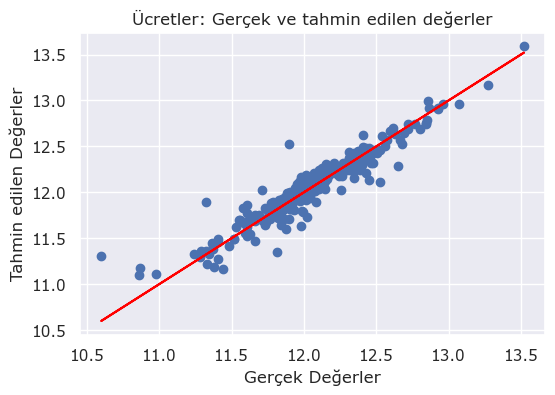

Ortalama Mutlak Hata (MAE)        : 0.08295319695110381
Ortalama Kare Hata (MSE)          : 0.015278865557541483
Kök Ortalama Kare Hata (RMSE)     : 0.12360770832574108
Ortalama Mutlak Yüzde Hata (MAPE) : 0.6951637435144491


In [67]:
X_test = sm.add_constant(X_test)
y_preds = sonuclar.predict(X_test)
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Ücretler: Gerçek ve tahmin edilen değerler")
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

<p style="font-size:120%;"> Eğittiğimiz ikinci modelimizin R-karesi 0.938 olmuştur ve R-karesi 0.879 olan önceki modelden daha yüksektir. Bu, ikinci modelin uyumunun bir öncekinden daha yüksek olduğu anlamına gelir. Bu modeli kullanarak tahminler yaptığımızda değerlendirme metriklerimizinde küçüldüğünü görebiliriz.Önceki modele kıyasla, bu ikinci model hedefin yüksek değerlerini daha iyi tahmin ediyor diyebiliriz.</p>

<h1>Ridge, Lasso ve ElasticNet </h1>

In [68]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0011427582214058596
Mean absolute error of the prediction is: 0.29261181967791544
Mean squared error of the prediction is: 0.15262088159087062
Root mean squared error of the prediction is: 0.39066722615401284
Mean absolute percentage error of the prediction is: 2.4296756969233653


In [69]:
lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0011427582214058596
Mean absolute error of the prediction is: 0.29261181967791544
Mean squared error of the prediction is: 0.15262088159087062
Root mean squared error of the prediction is: 0.39066722615401284
Mean absolute percentage error of the prediction is: 2.4296756969233653


In [70]:
elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model in training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.0
-----Test set statistics-----
R-squared of the model in test set is: -0.0011427582214058596
Mean absolute error of the prediction is: 0.29261181967791544
Mean squared error of the prediction is: 0.15262088159087062
Root mean squared error of the prediction is: 0.39066722615401284
Mean absolute percentage error of the prediction is: 2.4296756969233653


<p>Lasso, Ridge ve ElasticNet regülarizasyonlarını inceledeiğimizde eğitim seti ve test setinin R kare değeri arasında çok fark olmadığını görüyoruz. Sonuç olarak modelimiz 'overfit' veya 'underfit' durumunda değildir.</p>

In [71]:
# Linear Regression Cross Validate
from sklearn.model_selection import cross_validate, cross_val_score
lrm = LinearRegression()
cv = cross_validate(estimator = lrm, 
                    X = X,
                    y = Y,
                    cv = 10,
                    return_train_score=True
                    )

print("Test score : \n {}, \n mean : {} \n".format(cv["test_score"],cv["test_score"].mean()))
print("Train score : \n{} ,\n mean : {}".format(cv["train_score"],cv["train_score"].mean()))

Test score : 
 [0.90739513 0.93589044 0.94019487 0.90565236 0.91871288 0.91656063
 0.91834709 0.9313276  0.92394335 0.91875032], 
 mean : 0.9216774659161644 

Train score : 
[0.93414052 0.93160995 0.93032034 0.93494027 0.933523   0.93311049
 0.9333075  0.93203153 0.93251657 0.93319452] ,
 mean : 0.9328694700852864


<h1>Decision Tree</h1>

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt_reg = DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [73]:
from sklearn.metrics import mean_squared_error as MSE
y_predict = dt_reg.predict(X_test)
mse_dt = MSE(y_predict, y_test)
rmse_ka = mse_dt**(1/2)

# Print rmse_dt
print("Karar Ağacının RMSE değeri : {:.2f}".format(rmse_ka))

Karar Ağacının RMSE değeri : 0.18


<h1>Random Forest</h1>

In [74]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=25, random_state=2)
random_forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [75]:
from sklearn.metrics import mean_squared_error as MSE
y_prediction = random_forest.predict(X_test)
rmse_test = MSE(y_test, y_prediction)**(1/2)
print("Rastgele Orman RMSE Değeri : {:.2f}".format(rmse_test))

Rastgele Orman RMSE Değeri : 0.13


<p>Decision Tree ve Random Forest algoritmalarını incelediğimizde Random Forest RMSE değerinin decision tree değerinden düşük olduğunu söyleriz. Yani Random Forest daha iyi performans göstermiştir.</p>

<h1>SVM</h1>

In [80]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='linear', C=0.01)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test = MSE(y_test, y_predict)**(1/2)
print(" Value of RMSE (Kernel = linear): {:.2f}".format(rmse_test))

 Value of RMSE (Kernel = linear): 0.59


<h1>XGBoost</h1>

In [81]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)

In [82]:
xg_reg.fit(X_train,y_train)
y_predict = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.129131


In [83]:
DM_train = xgb.DMatrix(data = X_train, label=y_train)
DM_test =  xgb.DMatrix(data = X_test, label=y_test)
params = {"booster":"gblinear", "objective":"reg:squarederror"}
xg_reg = xgb.train(dtrain=DM_train, params=params, num_boost_round=5)

In [86]:
y_predict_gblinear = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test, y_predict_gblinear))
print("RMSE: %f" % (rmse))

RMSE: 20.490319


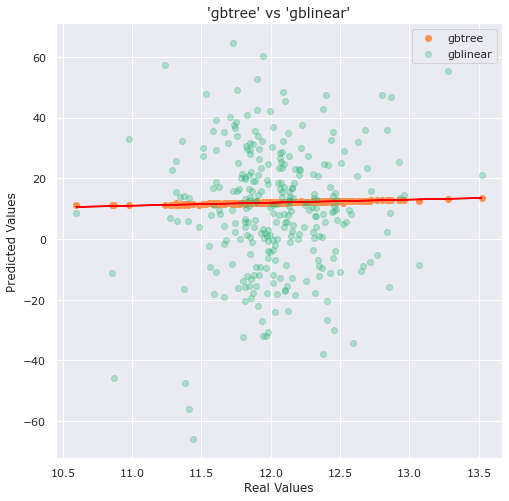

In [85]:
plt.figure(figsize=(8,8))
plt.title("'gbtree' vs 'gblinear'", size = 14)
ax1 = plt.scatter(y_test, y_predict, color = '#FF914D')
ax2 = plt.scatter(y_test, y_predict_gblinear, color='#22B573', alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('gbtree', 'gblinear'))
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()

In [87]:
from xgboost import XGBRegressor
XGB = XGBRegressor(max_depth=2,learning_rate=0.1,n_estimators=1000,reg_alpha=0.001,reg_lambda=0.000001,n_jobs=-1,min_child_weight=3)
XGB.fit(X_train,y_train)

params = {
        'learning_rate': [0.1, 0.3, 0.5],
        'max_depth': [1, 3, 5],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.1, 0.3, 0.5],
        'colsample_bytree': [0.1, 0.3, 0.5],
        'n_estimators' : [100, 200, 300, 500, 750],
        'objective': ['reg:squarederror']
}

xgbr_grid = GridSearchCV(estimator = XGBRegressor(),
                         param_grid = params,
                         cv = 3)

xgbr_grid.fit(X, Y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [88]:
print ("Training score:",XGB.score(X_train,y_train),"Test Score:",XGB.score(X_test,y_test))

Training score: 0.9888039494452875 Test Score: 0.8988434856002253


<h1>Light GBM</h1>

In [89]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [90]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [91]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.133259


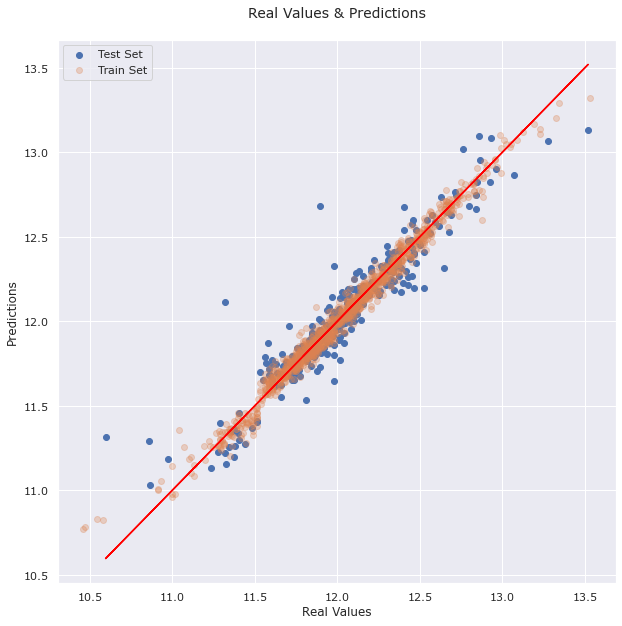

In [92]:
plt.figure(figsize=(10,10))
plt.title('Real Values & Predictions\n', size = 14)
ax1 = plt.scatter(y_test, y_predict)
ax2 = plt.scatter(y_train, y_predict_train,alpha=0.30)
ax3 = plt.plot(y_test, y_test, color="red")
plt.legend((ax1, ax2), ('Test Set', 'Train Set'))
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.show()

<h2>Sonuç</h2>

<p>Log transorm dönüşümü yapıp normal dağılıma yaklaştıktan sonra regresyon işlemlerini yaptık.<br> <b>XGBoost</b> en yüksek sonucu verdi.</p>